In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import warnings
import statistics

In [3]:
## Reading the CSV File 

Weather_data = pd.read_csv("Bombing_Weather_Data.csv")

In [4]:
Weather_data.head(10)

,Unnamed: 0,Unnamed: 0.1,Success,Month,Day,Year,Country,DefCity,DefCountry,Latitude,...,MeanTemp,MinAirTemp,SunDuration,MeanCloudCover,MeanCloudVapor,MeanRelHumid,PrecipHeight,PrecipForm,MeanPressure,SnowDepth
0,3,3,0,9,3,1939,United Kingdom,Wilhelmshaven,Germany,53.53234,...,67.868000,55.295000,7.757143,4.500000,17.153333,73.800000,1.433333,0.0,1011.783333,0.000000
1,4,4,0,9,3,1939,United Kingdom,Wilhelmshaven,Germany,53.53234,...,67.868000,55.295000,7.757143,4.500000,17.153333,73.800000,1.433333,0.0,1011.783333,0.000000
2,5,5,0,9,4,1939,United Kingdom,Wilhelmshaven,Germany,53.53234,...,63.512000,56.735000,1.957143,6.573333,15.940000,79.266667,8.813333,1.0,1010.033333,0.000000
3,6,6,0,9,4,1939,United Kingdom,Wilhelmshaven,Germany,53.53234,...,63.512000,56.735000,1.957143,6.573333,15.940000,79.266667,8.813333,1.0,1010.033333,0.000000
4,11,11,1,12,18,1939,Germany,Wilhelmshaven,Germany,53.53234,...,22.676000,13.792308,2.775000,2.180000,3.520000,83.800000,0.000000,0.0,1021.316667,0.066667
5,18,18,1,5,15,1940,United Kingdom,Ruhr,Germany,51.37315,...,56.783158,42.440000,12.266667,2.386842,9.711111,62.611111,0.005263,0.0,984.091304,0.000000
6,19,19,1,5,19,1940,France,Berlin,Germany,52.52001,...,51.431429,38.942857,8.600000,4.890000,7.861111,61.894737,0.709091,0.0,999.964706,0.000000
7,24,24,1,6,7,1940,France,Berlin,Germany,52.52001,...,66.609091,51.645714,13.915385,2.214286,13.916667,64.300000,0.000000,0.0,997.572222,0.000000
8,30,30,1,8,25,1940,United Kingdom,Berlin,Germany,52.52001,...,57.157143,47.042857,2.978571,7.380000,13.461111,85.842105,1.509091,1.0,1004.058824,0.000000
9,37,37,1,1,21,1941,Germany,Berlin,Germany,52.52001,...,37.092941,28.965714,0.028571,7.737500,6.366667,85.125000,1.811765,1.0,974.200000,19.187500


In [5]:
Weather_data.drop(Weather_data.columns[[0]], axis=1, inplace=True)

In [6]:
Weather_data.head(10)

,Unnamed: 0.1,Success,Month,Day,Year,Country,DefCity,DefCountry,Latitude,Longitude,...,MeanTemp,MinAirTemp,SunDuration,MeanCloudCover,MeanCloudVapor,MeanRelHumid,PrecipHeight,PrecipForm,MeanPressure,SnowDepth
0,3,0,9,3,1939,United Kingdom,Wilhelmshaven,Germany,53.53234,8.106872,...,67.868000,55.295000,7.757143,4.500000,17.153333,73.800000,1.433333,0.0,1011.783333,0.000000
1,4,0,9,3,1939,United Kingdom,Wilhelmshaven,Germany,53.53234,8.106872,...,67.868000,55.295000,7.757143,4.500000,17.153333,73.800000,1.433333,0.0,1011.783333,0.000000
2,5,0,9,4,1939,United Kingdom,Wilhelmshaven,Germany,53.53234,8.106872,...,63.512000,56.735000,1.957143,6.573333,15.940000,79.266667,8.813333,1.0,1010.033333,0.000000
3,6,0,9,4,1939,United Kingdom,Wilhelmshaven,Germany,53.53234,8.106872,...,63.512000,56.735000,1.957143,6.573333,15.940000,79.266667,8.813333,1.0,1010.033333,0.000000
4,11,1,12,18,1939,Germany,Wilhelmshaven,Germany,53.53234,8.106872,...,22.676000,13.792308,2.775000,2.180000,3.520000,83.800000,0.000000,0.0,1021.316667,0.066667
5,18,1,5,15,1940,United Kingdom,Ruhr,Germany,51.37315,7.629154,...,56.783158,42.440000,12.266667,2.386842,9.711111,62.611111,0.005263,0.0,984.091304,0.000000
6,19,1,5,19,1940,France,Berlin,Germany,52.52001,13.404950,...,51.431429,38.942857,8.600000,4.890000,7.861111,61.894737,0.709091,0.0,999.964706,0.000000
7,24,1,6,7,1940,France,Berlin,Germany,52.52001,13.404950,...,66.609091,51.645714,13.915385,2.214286,13.916667,64.300000,0.000000,0.0,997.572222,0.000000
8,30,1,8,25,1940,United Kingdom,Berlin,Germany,52.52001,13.404950,...,57.157143,47.042857,2.978571,7.380000,13.461111,85.842105,1.509091,1.0,1004.058824,0.000000
9,37,1,1,21,1941,Germany,Berlin,Germany,52.52001,13.404950,...,37.092941,28.965714,0.028571,7.737500,6.366667,85.125000,1.811765,1.0,974.200000,19.187500


In [7]:
### Creating a list for Independent Variables


### Selecting all the parameters here for now, we can change it later 

independent_variables = ['MeanTemp','MinAirTemp','SunDuration',
                         'MeanCloudCover','MeanCloudVapor','MeanRelHumid',
                         'PrecipHeight','PrecipForm','MeanPressure','SnowDepth']

predictors = Weather_data[independent_variables]



### Success as the Denendent Variable

success = Weather_data.Success 

### Creating Training and Test Data Sets 

In [8]:
# split into training and testing sets

from sklearn.model_selection import train_test_split
predictors_train,predictors_test,success_train,success_test=train_test_split(predictors,success,test_size=0.25,random_state=0)                         
                         

In [9]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [10]:
## Fit the Model

logreg.fit(predictors_train,success_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
success_pred=logreg.predict(predictors_test)

In [12]:
#### Build a Confusion Metrics

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(success_test, success_pred)
cnf_matrix

array([[ 1,  4],
       [ 0, 11]])

Text(0.5, 257.44, 'Predicted label')

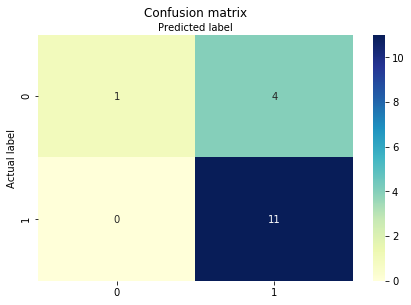

In [13]:
#### Matplot Lib!!!!! 

# import required modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Draw the Confusion Metric plot

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Since there was not a whole lot of data to test, trying to pass training data to the model to see the results

In [14]:
success_pred_training = logreg.predict(predictors_train)

In [15]:
#### Build a Confusion Metrics

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(success_train, success_pred_training)
cnf_matrix

array([[ 1,  7],
       [ 0, 40]])

Text(0.5, 257.44, 'Predicted label')

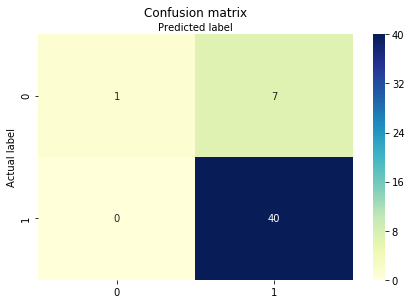

In [16]:
#### Draw the Confusion Metric plot

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
print("Accuracy:",metrics.accuracy_score(success_train, success_pred_training))
print("Precision:",metrics.precision_score(success_train, success_pred_training))
print("F1-Score:",metrics.f1_score(success_train, success_pred_training))

Accuracy: 0.8541666666666666
Precision: 0.851063829787234
F1-Score: 0.9195402298850576


In [18]:
### Checking the Success and Failure Probablities that were calculated based on the model fitted

success_pred_tr_prob = logreg.predict_proba(predictors_train)
print(success_pred_tr_prob)

[[0.06978313 0.93021687]
 [0.11176669 0.88823331]
 [0.40031328 0.59968672]
 [0.07239396 0.92760604]
 [0.15969083 0.84030917]
 [0.13273562 0.86726438]
 [0.46966884 0.53033116]
 [0.07451335 0.92548665]
 [0.06306281 0.93693719]
 [0.08449373 0.91550627]
 [0.34452358 0.65547642]
 [0.08358046 0.91641954]
 [0.11471556 0.88528444]
 [0.11899954 0.88100046]
 [0.34454126 0.65545874]
 [0.08850166 0.91149834]
 [0.10325659 0.89674341]
 [0.10540793 0.89459207]
 [0.19920007 0.80079993]
 [0.09487822 0.90512178]
 [0.16967493 0.83032507]
 [0.11031632 0.88968368]
 [0.10444539 0.89555461]
 [0.2818636  0.7181364 ]
 [0.10364051 0.89635949]
 [0.18836691 0.81163309]
 [0.15139177 0.84860823]
 [0.25134637 0.74865363]
 [0.06055897 0.93944103]
 [0.23151493 0.76848507]
 [0.30264972 0.69735028]
 [0.12618168 0.87381832]
 [0.07432986 0.92567014]
 [0.10944252 0.89055748]
 [0.08473893 0.91526107]
 [0.12405381 0.87594619]
 [0.13897756 0.86102244]
 [0.20576895 0.79423105]
 [0.15459158 0.84540842]
 [0.10364354 0.89635646]


#### So Ideally less than 0.5 is considered as 0 and greater than 0.5 is considered as one. In the right hand column above we are going to Set a threshold of 0.6 to see if we get better results

In [19]:
threshold = 0.71

raised_threshold_success = np.where(success_pred_tr_prob[:,1]>threshold,1,0)
print(raised_threshold_success)

[1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 1 1 1]


Text(0.5, 257.44, 'Predicted label')

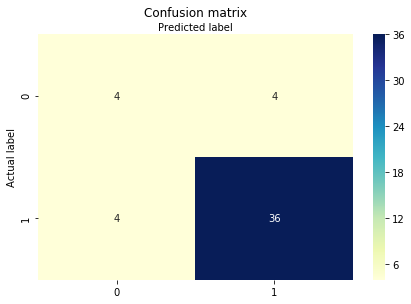

In [20]:
### Check the Confusion Metrics again 

cnf_matrix2 = metrics.confusion_matrix(success_train, raised_threshold_success)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [22]:
print("Accuracy:",metrics.accuracy_score(success_train, raised_threshold_success))
print("Precision:",metrics.precision_score(success_train, raised_threshold_success))
print("F1-Score:",metrics.f1_score(success_train, raised_threshold_success))

Accuracy: 0.8333333333333334
Precision: 0.9
F1-Score: 0.9
